<a href="https://colab.research.google.com/github/gopal-vsg/ED_analysis_french_rail_transport/blob/main/ED_analysis_cintel_ngai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ED analysis of Train transport timings in France
done by : Vallu Sai Gopal

In [2]:
pip install opendatasets --upgrade --quiet

## dowloading the dataset from kaggle

In [34]:
import opendatasets as od
url = 'https://www.kaggle.com/datasets/gatandubuc/public-transport-traffic-data-in-france'
od.download(url)

Skipping, found downloaded files in "./public-transport-traffic-data-in-france" (use force=True to force download)


##data set

In [35]:
data = '/content/public-transport-traffic-data-in-france/Regularities_by_liaisons_Trains_France.csv'

## data preprocessing ans cleaning

In [36]:
import pandas as pd
df = pd.read_csv(data)
df

,Year,Month,Departure station,Arrival station,Average travel time (min),Number of expected circulations,Number of cancelled trains,Number of late trains at departure,Average delay of late departing trains (min),Average delay of all departing trains (min),...,Average train delay > 15min,Number of late trains > 30min,Number of late trains > 60min,Period,Delay due to external causes,Delay due to railway infrastructure,Delay due to traffic management,Delay due to rolling stock,Delay due to station management and reuse of material,Delay due to travellers taken into account
0,2019,7.0,ANGOULEME,PARIS MONTPARNASSE,131.914980,247.0,0.0,191.0,3.576353,2.678273,...,32.965873,7.0,2.0,2019-07,25.000000,15.000000,27.500000,12.500000,2.500000,17.500000
1,2019,7.0,PARIS MONTPARNASSE,LA ROCHELLE VILLE,175.611570,242.0,0.0,178.0,9.780805,7.033609,...,32.057143,14.0,2.0,2019-07,20.000000,24.444444,26.666667,24.444444,0.000000,4.444444
2,2019,7.0,LE MANS,PARIS MONTPARNASSE,62.395349,435.0,5.0,391.0,3.896974,3.529341,...,42.367241,13.0,4.0,2019-07,16.176471,32.352941,26.470588,14.705882,2.941176,7.352941
3,2019,7.0,ST MALO,PARIS MONTPARNASSE,172.421053,114.0,0.0,101.0,1.950990,1.685673,...,27.620833,2.0,0.0,2019-07,15.384615,15.384615,23.076923,38.461538,0.000000,7.692308
4,2019,7.0,PARIS MONTPARNASSE,ST PIERRE DES CORPS,67.310000,404.0,4.0,284.0,8.379108,5.803125,...,37.658333,12.0,3.0,2019-07,18.461538,12.307692,40.000000,16.923077,7.692308,4.615385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7801,2020,5.0,PARIS LYON,AVIGNON TGV,162.702381,191.0,23.0,50.0,5.359667,1.201190,...,46.264583,4.0,1.0,2020-05,27.272727,18.181818,9.090909,36.363636,9.090909,0.000000
7802,2020,5.0,PARIS LYON,MARSEILLE ST CHARLES,197.241206,227.0,28.0,54.0,5.702160,1.125963,...,49.050000,6.0,1.0,2020-05,30.000000,30.000000,10.000000,30.000000,0.000000,0.000000
7803,2020,5.0,PARIS LYON,NIMES,182.094828,129.0,13.0,20.0,2.996667,0.040517,...,48.305556,1.0,1.0,2020-05,20.000000,80.000000,0.000000,0.000000,0.000000,0.000000
7804,2020,5.0,PARIS LYON,SAINT ETIENNE CHATEAUCREUX,NaN,NaN,4.0,0.0,0.000000,NaN,...,NaN,NaN,NaN,2020-05,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
df.columns

Index(['Year', 'Month', 'Departure station', 'Arrival station',
       'Average travel time (min)', 'Number of expected circulations',
       'Number of cancelled trains', 'Number of late trains at departure',
       'Average delay of late departing trains (min)',
       'Average delay of all departing trains (min)',
       'Comment (optional) delays at departure',
       'Number of trains late on arrival',
       'Average delay of late arriving trains (min)',
       'Average delay of all arriving trains (min)',
       'Comment (optional) delays on arrival',
       '% trains late due to external causes (weather, obstacles, suspicious packages, malevolence, social movements, etc.)',
       '% trains late due to railway infrastructure (maintenance, works)',
       '% trains late due to traffic management (rail line traffic, network interactions)',
       '% trains late due to rolling stock',
       '% trains late due to station management and reuse of material',
       '% trains late due

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7806 entries, 0 to 7805
Data columns (total 32 columns):
 #   Column                                                                                                               Non-Null Count  Dtype  
---  ------                                                                                                               --------------  -----  
 0   Year                                                                                                                 7806 non-null   int64  
 1   Month                                                                                                                7806 non-null   float64
 2   Departure station                                                                                                    7806 non-null   object 
 3   Arrival station                                                                                                      7806 non-null   object 
 4   Average trav

In [39]:
df.describe()

,Year,Month,Average travel time (min),Number of expected circulations,Number of cancelled trains,Number of late trains at departure,Average delay of late departing trains (min),Average delay of all departing trains (min),Comment (optional) delays at departure,Number of trains late on arrival,...,Number of late trains > 15min,Average train delay > 15min,Number of late trains > 30min,Number of late trains > 60min,Delay due to external causes,Delay due to railway infrastructure,Delay due to traffic management,Delay due to rolling stock,Delay due to station management and reuse of material,Delay due to travellers taken into account
count,7806.000000,7806.000000,7743.000000,7743.000000,7806.000000,7806.000000,7806.000000,7743.000000,0.0,7706.000000,...,7738.000000,7699.000000,7738.000000,7738.000000,7535.000000,7535.000000,7535.000000,7535.000000,7535.000000,7535.000000
mean,2017.345119,6.216372,166.759261,266.510913,7.911478,63.519088,14.744145,2.956191,NaN,36.019595,...,24.545231,29.379555,11.055441,4.000129,26.708546,25.504166,19.195005,18.109877,6.768831,3.643517
std,1.596611,3.440601,80.737092,157.456548,20.997806,78.822324,13.373758,5.951154,NaN,29.210396,...,20.323532,18.929319,9.921009,4.459822,16.280439,16.010052,14.880847,13.282123,7.877975,5.782651
min,2015.000000,1.000000,35.888889,1.000000,0.000000,0.000000,0.000000,-229.269444,NaN,0.000000,...,0.000000,-118.022363,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2016.000000,3.000000,100.643605,163.000000,0.000000,12.000000,7.559617,1.007765,NaN,16.000000,...,10.000000,9.177749,4.000000,1.000000,15.625000,15.000000,8.695652,9.259259,0.000000,0.000000
50%,2017.000000,6.000000,162.178808,227.000000,1.000000,33.000000,13.535727,2.014571,NaN,28.000000,...,19.000000,32.022500,8.000000,3.000000,25.000000,23.529412,17.142857,16.129032,5.000000,1.754386
75%,2019.000000,9.000000,207.885957,352.000000,6.000000,84.000000,18.713366,3.691398,NaN,48.000000,...,33.000000,41.313095,15.000000,6.000000,35.714286,33.333333,26.923077,25.000000,10.000000,5.555556
max,2020.000000,12.000000,786.500000,960.000000,279.000000,591.000000,316.188095,173.571429,NaN,235.000000,...,192.000000,258.000000,91.000000,37.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


## missing value percentage in each column
we are going to ignore the
Comment (optional) delays at departure     
Comment (optional) delays on arrival  

rest all data is perfectly fine

In [40]:
missing_percentage = df.isna().sum().sort_values(ascending = False)
(missing_percentage/len(df))*10

Comment (optional) delays at departure                                                                                 10.000000
Comment (optional) delays on arrival                                                                                    7.690238
% trains late due to railway infrastructure (maintenance, works)                                                        0.347169
Delay due to station management and reuse of material                                                                   0.347169
Delay due to rolling stock                                                                                              0.347169
Delay due to traffic management                                                                                         0.347169
Delay due to railway infrastructure                                                                                     0.347169
Delay due to external causes                                                                     

<Axes: >

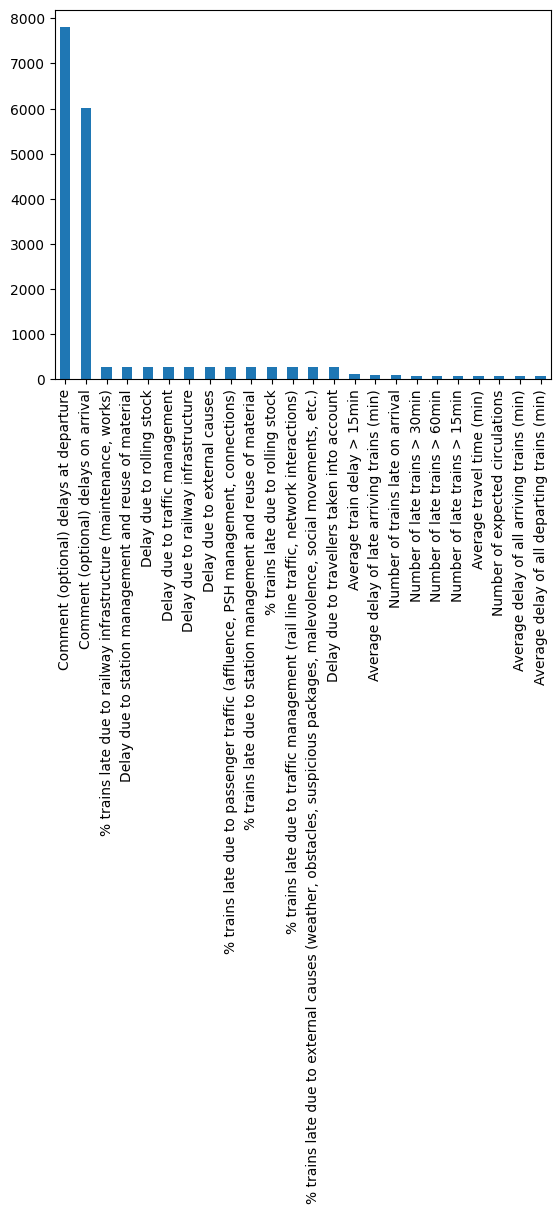

In [41]:
missing_percentage[missing_percentage > 0.2 ].plot(kind='bar')

## removing
'Comment (optional) delays at departure','Comment (optional) delays on arrival'

In [42]:
columns_to_drop = ['Comment (optional) delays at departure','Comment (optional) delays on arrival']
df = df.drop(columns=columns_to_drop)

In [43]:
missing_percentage = df.isna().sum().sort_values(ascending = False)
(missing_percentage/len(df))*10

% trains late due to traffic management (rail line traffic, network interactions)                                      0.347169
% trains late due to external causes (weather, obstacles, suspicious packages, malevolence, social movements, etc.)    0.347169
Delay due to station management and reuse of material                                                                  0.347169
Delay due to rolling stock                                                                                             0.347169
Delay due to traffic management                                                                                        0.347169
Delay due to railway infrastructure                                                                                    0.347169
Delay due to external causes                                                                                           0.347169
% trains late due to passenger traffic (affluence, PSH management, connections)                         

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7806 entries, 0 to 7805
Data columns (total 30 columns):
 #   Column                                                                                                               Non-Null Count  Dtype  
---  ------                                                                                                               --------------  -----  
 0   Year                                                                                                                 7806 non-null   int64  
 1   Month                                                                                                                7806 non-null   float64
 2   Departure station                                                                                                    7806 non-null   object 
 3   Arrival station                                                                                                      7806 non-null   object 
 4   Average trav

## columns I consider for ED analysis
- Timelines(month and year)
- Departure and arrival stations
- Delay of trains( arriving & departing )
- Factors causing Delay


## total arrival & departure stations operated

In [106]:
arrival_st = df['Arrival station']
arrival_st.unique()

array(['PARIS MONTPARNASSE', 'LA ROCHELLE VILLE', 'ST PIERRE DES CORPS',
       'TOULOUSE MATABIAU', 'METZ', 'REIMS', 'DOUAI', 'LILLE',
       'MARSEILLE ST CHARLES', 'BORDEAUX ST JEAN', 'MARNE LA VALLEE',
       'PARIS LYON', 'LYON PART DIEU', 'GENEVE', 'PARIS EST', 'DUNKERQUE',
       'VALENCE ALIXAN TGV', 'STRASBOURG', 'QUIMPER', 'POITIERS',
       'NANTES', 'ST MALO', 'AIX EN PROVENCE TGV', 'GRENOBLE', 'ANNECY',
       'MONTPELLIER', 'TOURS', 'ANGERS SAINT LAUD', 'BELLEGARDE (AIN)',
       'LE CREUSOT MONTCEAU MONTCHANIN', 'TOURCOING', 'LAVAL',
       'NICE VILLE', 'PERPIGNAN', 'ARRAS', 'BREST',
       'SAINT ETIENNE CHATEAUCREUX', 'STUTTGART', 'PARIS NORD',
       'MULHOUSE VILLE', 'RENNES', 'ITALIE', 'MACON LOCHE', 'NANCY',
       'ANGOULEME', 'PARIS VAUGIRARD', 'CHAMBERY CHALLES LES EAUX',
       'NIMES', 'ZURICH', 'LAUSANNE', 'TOULON', 'DIJON VILLE',
       'FRANCFORT', 'VANNES', 'AVIGNON TGV', 'BESANCON FRANCHE COMTE TGV',
       'LE MANS', 'MADRID', 'BARCELONA'], dtype=object

In [54]:
dpt = df['Departure station']
dpt.unique()

array(['ANGOULEME', 'PARIS MONTPARNASSE', 'LE MANS', 'ST MALO',
       'TOULOUSE MATABIAU', 'PARIS EST', 'PARIS NORD', 'LYON PART DIEU',
       'LILLE', 'TOURCOING', 'MARSEILLE ST CHARLES', 'ANNECY',
       'CHAMBERY CHALLES LES EAUX', 'PARIS LYON', 'GENEVE', 'MADRID',
       'STRASBOURG', 'NICE VILLE', 'TOULON', 'TOURS', 'BARCELONA',
       'MULHOUSE VILLE', 'FRANCFORT', 'RENNES', 'VANNES',
       'BELLEGARDE (AIN)', 'NANTES', 'ARRAS', 'BORDEAUX ST JEAN',
       'PERPIGNAN', 'ZURICH', 'METZ', 'DOUAI', 'LAVAL', 'AVIGNON TGV',
       'STUTTGART', 'ITALIE', 'ANGERS SAINT LAUD', 'DIJON VILLE',
       'MONTPELLIER', 'POITIERS', 'BREST', 'MACON LOCHE',
       'MARNE LA VALLEE', 'LA ROCHELLE VILLE', 'VALENCE ALIXAN TGV',
       'ST PIERRE DES CORPS', 'BESANCON FRANCHE COMTE TGV', 'LAUSANNE',
       'GRENOBLE', 'REIMS', 'AIX EN PROVENCE TGV', 'NANCY', 'QUIMPER',
       'LE CREUSOT MONTCEAU MONTCHANIN', 'NIMES', 'DUNKERQUE',
       'SAINT ETIENNE CHATEAUCREUX', 'PARIS VAUGIRARD'], dtype=object

## most busy arrival and departure stations

<Axes: >

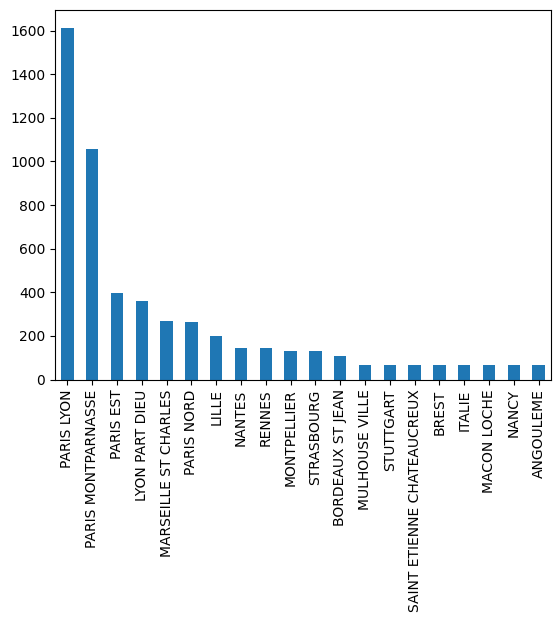

In [62]:
arrival_st.value_counts()[:20].plot(kind='bar')

<Axes: >

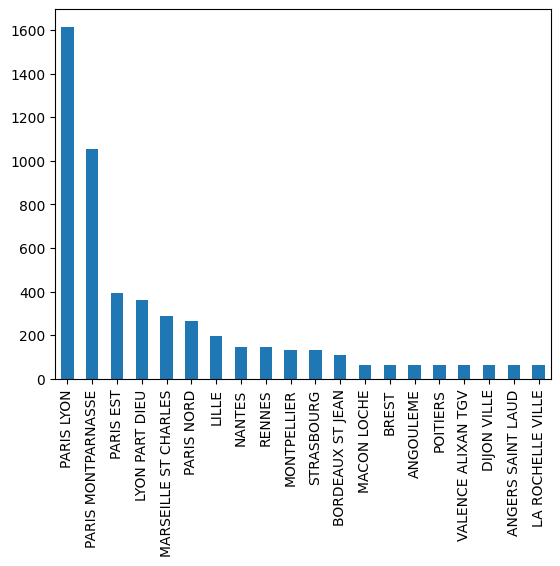

In [61]:
dpt.value_counts()[:20].plot(kind='bar')

## Average Travel Time from 2015 to 2017
as you can see 2019 is experienced the longest average time
where as 2020 experience a fall due to covid-19

<Axes: xlabel='Year', ylabel='Average travel time (min)'>

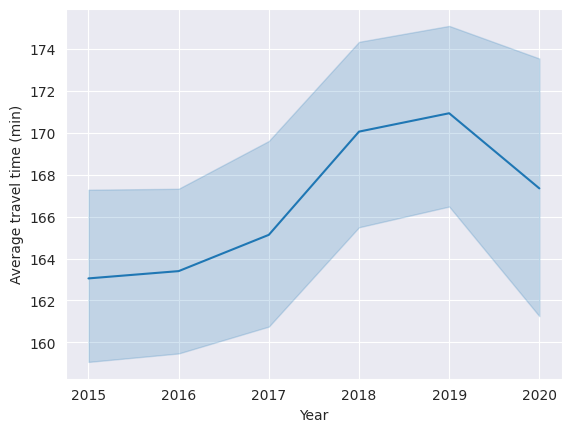

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')

sns.lineplot(data=df, x="Year", y="Average travel time (min)")

## Number of trains late on dpt and arrival
2019 there are significantly more trains departing late

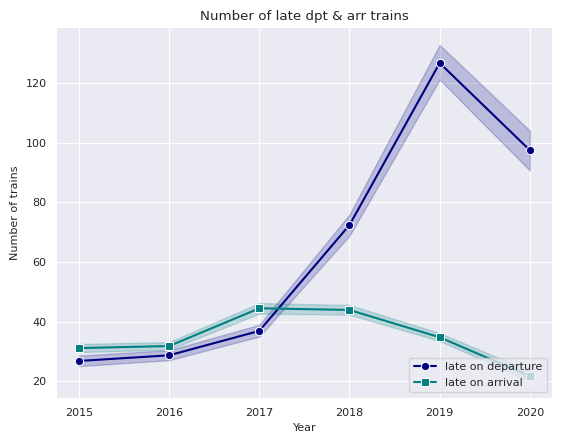

In [67]:
plt.rcParams.update({'font.size': 8})

sns.lineplot(x='Year', y='Number of late trains at departure', data=df, marker='o', color='navy', label='late on departure')
sns.lineplot(x='Year', y='Number of trains late on arrival', data=df, marker='s', color='teal', label='late on arrival  ')


plt.title('Number of late dpt & arr trains')
plt.xlabel('Year')
plt.ylabel('Number of trains')

plt.legend(loc='lower right')
plt.grid(True)
sns.despine()

plt.show()

## average delay in arrival and departure
2018 has the highest avg delay time
overall delay time in arrival is significantly higher than departure

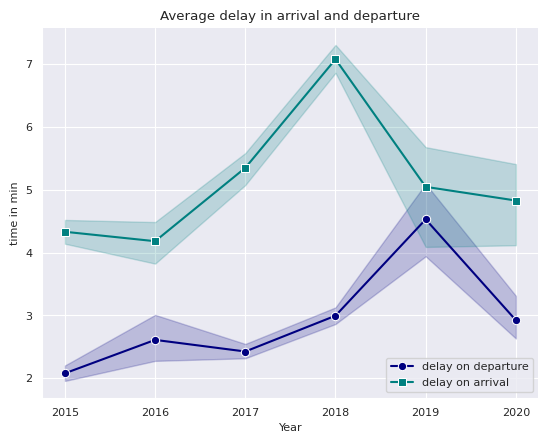

In [70]:
plt.rcParams.update({'font.size': 8})

sns.lineplot(x='Year', y='Average delay of all departing trains (min)', data=df, marker='o', color='navy', label='delay on departure')
sns.lineplot(x='Year', y='Average delay of all arriving trains (min)', data=df, marker='s', color='teal', label='delay on arrival  ')


plt.title('Average delay in arrival and departure')
plt.xlabel('Year')
plt.ylabel('time in min')

plt.legend(loc='lower right')
plt.grid(True)
sns.despine()

plt.show()

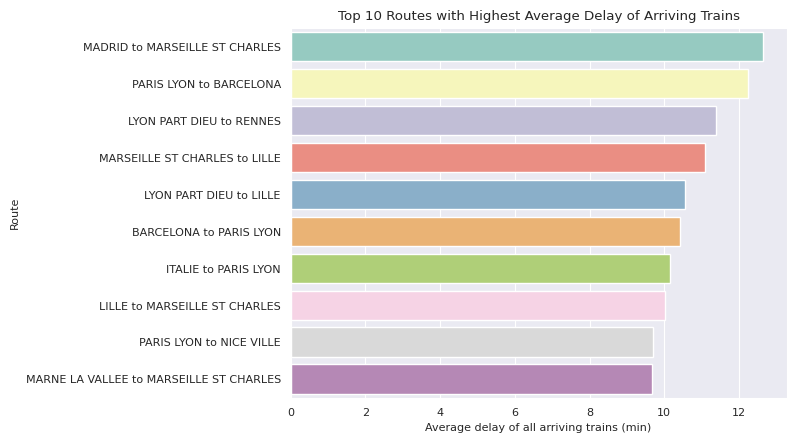

In [102]:
route_avg_delay = df.groupby(['Departure station', 'Arrival station'])['Average delay of all arriving trains (min)'].mean().reset_index()
sorted_routes = route_avg_delay.sort_values(by='Average delay of all arriving trains (min)', ascending=False)

top_routes = sorted_routes.head(10)


ax = sns.barplot(data=top_routes, x='Average delay of all arriving trains (min)', y=top_routes['Departure station'] + ' to ' + top_routes['Arrival station'])
plt.title(f'Top 10 Routes with Highest Average Delay of Arriving Trains')
plt.xlabel('Average delay of all arriving trains (min)')
plt.ylabel('Route')
plt.show()


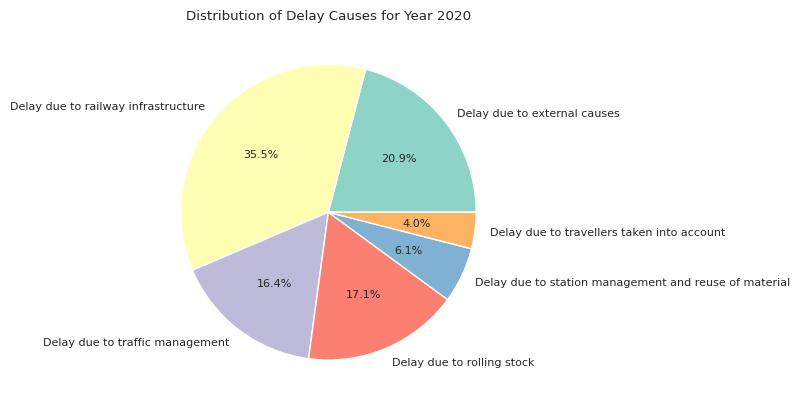

In [107]:
delay_cause_columns = [
    'Delay due to external causes',
    'Delay due to railway infrastructure',
    'Delay due to traffic management',
    'Delay due to rolling stock',
    'Delay due to station management and reuse of material',
    'Delay due to travellers taken into account'
]

delay_causes_by_year = df.groupby('Year')[delay_cause_columns].sum()

aggregated_data = delay_causes_by_year.stack().reset_index()
aggregated_data.columns = ['Year', 'DelayCause', 'TotalDelay']

latest_year = aggregated_data['Year'].max()
data_for_latest_year = aggregated_data[aggregated_data['Year'] == latest_year]

plt.pie(data_for_latest_year['TotalDelay'], labels=data_for_latest_year['DelayCause'], autopct='%1.1f%%')
plt.title('Distribution of Delay Causes for Year 2020')


plt.show()

## Question & Answer - Insights
- what railway stations operates most trains and why?

  Paris Lyon is a major transportation hub due to its central location, connecting high-speed rail lines and serving as a gateway to southern France and Europe.

- which year experienced the highest avg travelling time
  
  In France's 2019 railway system, increased average travel time may result from maintenance, weather, congestion, incidents, or technical issues affecting operations.

- which route trains experiences the average arr delay time

  madrid to marseille st, because this route is shared between two countries which are france and spain. so due to operational change this route experience the highest avg delay

- what are the main factor causing the delay, and why?

  35.5% due to railway infrastructure, as france is the phase of expanding their network to support high speed rails, so due to this extension works and maintainance work the trains are experiencing delay.